In [3]:
# %load ../../setup.py
"""
Packages for plotting and other stuff
version: 5.0
author: Riasat
"""
# %matplotlib widget

# data loading
import pandas as pd

# data maipulation
import pwlf
import numpy as np
from scipy.interpolate import interp1d, UnivariateSpline
from scipy.signal import find_peaks
from scipy import optimize

# plotting tools
import matplotlib.pyplot as plt

# extra tweaks
import warnings

warnings.filterwarnings("ignore")

# plot tweaks
plt.style.use("seaborn-poster")
pd.options.display.max_columns = None
pd.options.display.float_format = "{:.5f}".format

# function for extrapolation
def extrapolate1d(x, y):
    f = interp1d(x, y, kind="linear", fill_value="extrapolate")
    a = np.arange(0, x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# function for interpolation
def interpolate1d(x, y):
    f = interp1d(x, y, kind="linear", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# function for interpolation
def interpolate2d(x, y):
    f = interp1d(x, y, kind="quadratic", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# function for interpolation
def interpolate3d(x, y):
    f = interp1d(x, y, kind="cubic", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# funciton for polynomial fitting
def polfit(a, b, c):
    z = np.polyfit(a, b, c)
    f = np.poly1d(z)

    x = np.arange(a[0], a[len(a) - 1], 0.001)
    y = f(x)
    return x, y


# function for picewise linear fit
def picewise_linear_fit(x, y, segments):
    my_pwlf = pwlf.PiecewiseLinFit(x, y)  # fit my data
    res = my_pwlf.fit(segments)  # fit the data for n line segments
    # slopes = myPWLF.calc_slopes()  # calculate slopes

    # predict for the determined points
    xHat = np.linspace(min(x), max(x), num=10000)
    yHat = my_pwlf.predict(xHat)

    # calculate statistics
    # p = myPWLF.p_values(method="non-linear", step_size=1e-4)  # p-values
    # se = myPWLF.se  # standard errors
    return xHat, yHat


# curve fit
def cur_fit(x, y):
    func = lambda t, a, c, d: a * np.log(t + c) + d
    popt, pcov = optimize.curve_fit(func, x, y)  # type: ignore
    xx = np.arange(x[0], x[len(x) - 1], 0.001)
    yy = func(xx, *popt)
    return xx, yy


# Datas


In [4]:
# plateau datas
d1_plateau = pd.read_excel("data.xlsx", sheet_name="pd1")
d1_voltage = d1_plateau["d1_voltage"]
d1_counts = d1_plateau["d1_counts"]

d2_plateau = pd.read_excel("data.xlsx", sheet_name="pd2")
d2_voltage = d2_plateau["d2_voltage"]
d2_counts = d2_plateau["d2_counts"]

d3_plateau = pd.read_excel("data.xlsx", sheet_name="pd3")
d3_voltage = d3_plateau["d3_voltage"]
d3_counts = d3_plateau["d3_counts"]

# Functions


In [5]:
# function for interpolation
def interpolate(x, y):
    f = interp1d(x, y, kind="quadratic", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# funciton for polynomial fitting
def polfit(a, b, c):
    z = np.polyfit(a, b, c)
    f = np.poly1d(z)

    x = np.arange(a[0], a[len(a) - 1], 0.001)
    y = f(x)
    return x, y



# Plateau Curves


## Detector 1 

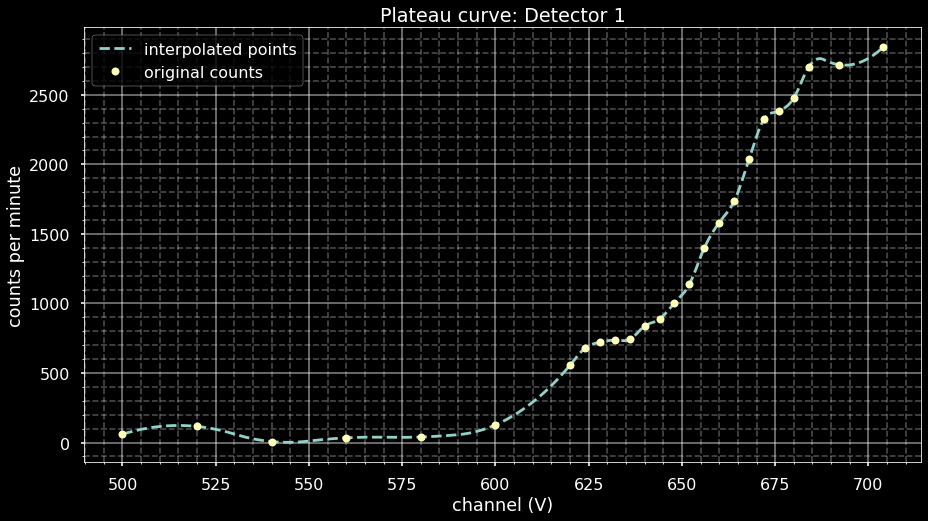

In [6]:
voltage_interpolated_d1, counts_interpolated_d1 = interpolate(d1_voltage, d1_counts)

plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))
plt.title(f"Plateau curve: Detector 1")
plt.xlabel("channel (V)")
plt.ylabel("counts per minute")
plt.plot(voltage_interpolated_d1, counts_interpolated_d1, "--", label="interpolated points")
plt.plot(d1_voltage, d1_counts, "o", markersize=8, label="original counts")
plt.legend(loc="upper left")
plt.grid(alpha=0.5, which="major")
plt.minorticks_on()
plt.grid(alpha=0.3, which="minor", ls="--")
plt.show()


## Detector 2

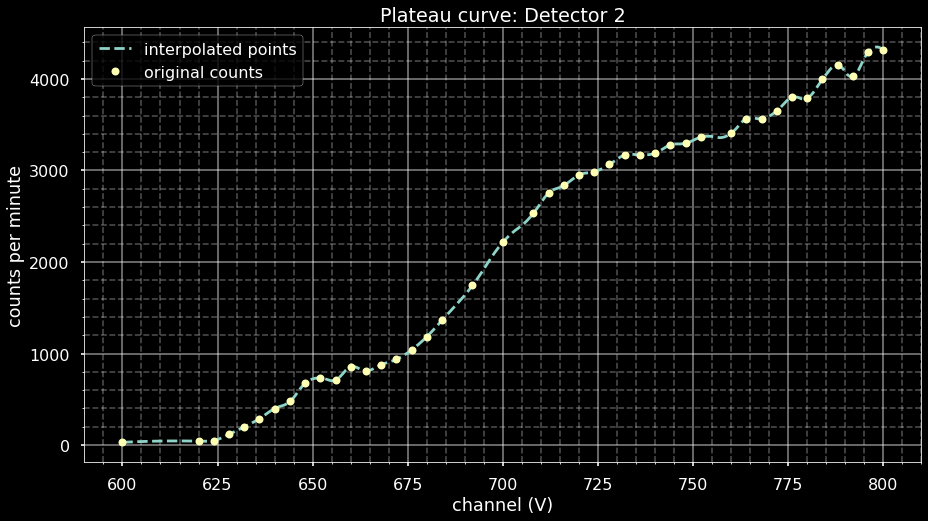

In [7]:
voltage_interpolated_d2, counts_interpolated_d2 = interpolate(d2_voltage, d2_counts)

plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))
plt.title(f"Plateau curve: Detector 2")
plt.xlabel("channel (V)")
plt.ylabel("counts per minute")
plt.plot(voltage_interpolated_d2, counts_interpolated_d2, "--", label="interpolated points")
plt.plot(d2_voltage, d2_counts, "o", markersize=8, label="original counts")
plt.legend(loc="upper left")
plt.grid(alpha=0.5, which="major")
plt.minorticks_on()
plt.grid(alpha=0.3, which="minor", ls="--")
plt.show()

## Detector 3

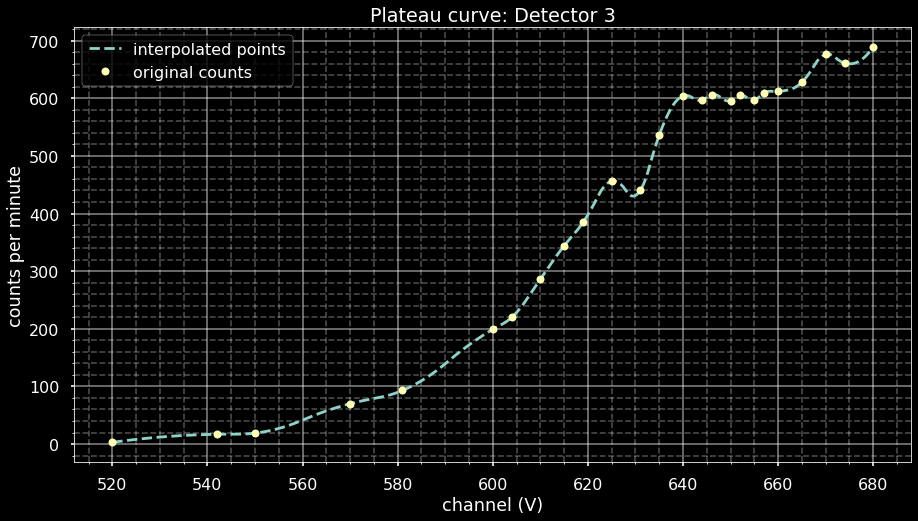

In [8]:
voltage_interpolated_d3, counts_interpolated_d3 = interpolate(d3_voltage, d3_counts)

plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))
plt.title(f"Plateau curve: Detector 3")
plt.xlabel("channel (V)")
plt.ylabel("counts per minute")
plt.plot(voltage_interpolated_d3, counts_interpolated_d3, "--", label="interpolated points")
plt.plot(d3_voltage, d3_counts, "o", markersize=8, label="original counts")
plt.legend(loc="upper left")
plt.grid(alpha=0.5, which="major")
plt.minorticks_on()
plt.grid(alpha=0.3, which="minor", ls="--")
plt.show()
